#  Практическое задание № 1: Байесовские рассуждения
## Байесовские методы в машинном обучении, осень 2022

### Михеев Борис, ВМК МГУ, ММП, 417 группа

#### Вариант 1

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from Boris_Miheev_v1 import *
from IPython.display import display, Latex

Задание параметров и диапазонов их значений:

In [2]:
params = {'amin': 75, 'amax': 90, 'bmin': 500, 'bmax': 600, 'p1': 0.1, 'p2': 0.01, 'p3': 0.3}

In [3]:
range_a = np.arange(params['amin'], params['amax'] + 1)
range_b = np.arange(params['bmin'], params['bmax'] + 1)
range_c = np.arange(params['amax'] + params['bmax'] + 1)
range_d = np.arange(2 * (params['amax'] + params['bmax']) + 1)

Вспомогательные функции для подсчета матожидания и дисперсии:

In [4]:
def E(prob, val):
    return np.dot(prob.T, val)

def D(probs, vals):
    return np.dot(probs.T, vals ** 2) - E(probs, vals) ** 2

Матожидания и дисперсии априорных распределений:

In [5]:
print('Model 1:')

Ea = E(pa(params, 1)[0], range_a)
Da = D(pa(params, 1)[0], range_a)
Eb = E(pb(params, 1)[0], range_b)
Db = D(pb(params, 1)[0], range_b)
Ec = E(pc(params, 1)[0], range_c)
Dc = D(pc(params, 1)[0], range_c)
Ed = E(pd(params, 1)[0], range_d)
Dd = D(pd(params, 1)[0], range_d)

print(f'Ea={Ea}, Da={Da}')
print(f'Eb={Eb}, Db={Db}')
print(f'Ec={Ec}, Dc={Dc}')
print(f'Ed={Ed}, Dd={Dd}')

Model 1:
Ea=82.5, Da=21.25
Eb=549.9999999999999, Db=850.0000000001164
Ec=13.749999999999904, Dc=13.167500000001013
Ed=17.87499999999988, Dd=25.140575000001604


In [6]:
print('Model 2:')

Ea = E(pa(params, 2)[0], range_a)
Da = D(pa(params, 2)[0], range_a)
Eb = E(pb(params, 2)[0], range_b)
Db = D(pb(params, 2)[0], range_b)
Ec = E(pc(params, 2)[0], range_c)
Dc = D(pc(params, 2)[0], range_c)
Ed = E(pd(params, 2)[0], range_d)
Dd = D(pd(params, 2)[0], range_d)

print(f'Ea={Ea}, Da={Da}')
print(f'Eb={Eb}, Db={Db}')
print(f'Ec={Ec}, Dc={Dc}')
print(f'Ed={Ed}, Dd={Dd}')

Model 2:
Ea=82.5, Da=21.25
Eb=549.9999999999999, Db=850.0000000001164
Ec=13.75, Dc=14.047500000000014
Ed=17.875000000000004, Dd=26.627774999999986


Графики распределений для с, модель 1:

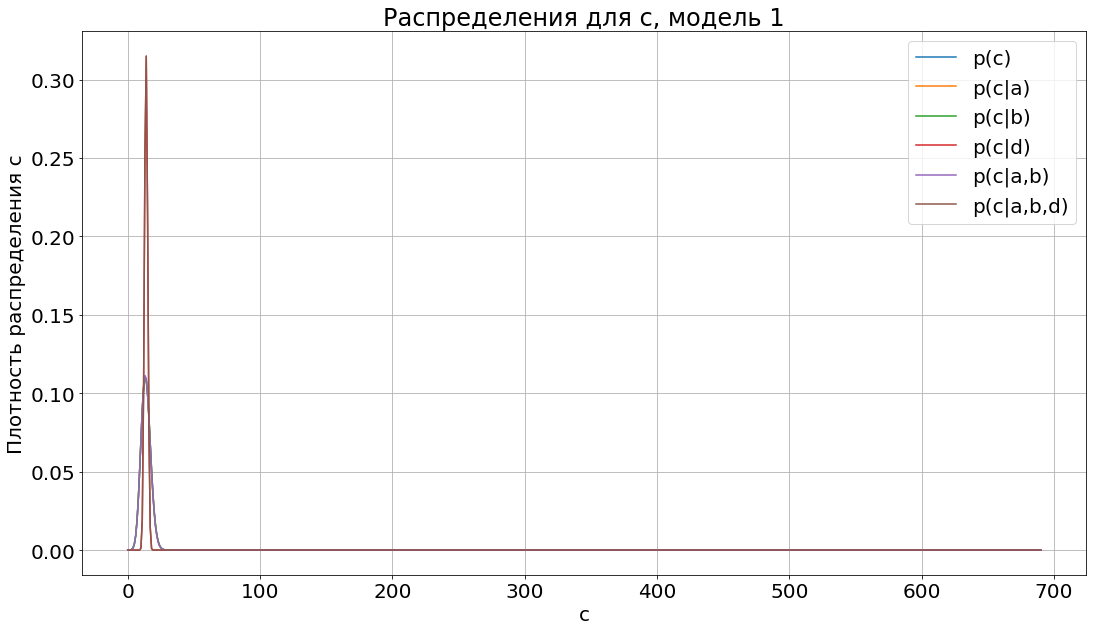

In [7]:
plt.figure(figsize=(18,10))
plt.rcParams['font.size']=20
Ea = np.array([np.round(E(pa(params, 1)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 1)[0], range_b), 0).astype(int)])
Ec = np.array([np.round(E(pc(params, 1)[0], range_c), 0).astype(int)])
Ed = np.array([np.round(E(pd(params, 1)[0], range_d), 0).astype(int)])


pc_vals = pc(params, 1)[0]
pc_a_vals = pc_a(Ea, params, 1)[0]
pc_b_vals = pc_b(Eb, params, 1)[0]
pc_d_vals = pc_d(Ed, params, 1)[0]
pc_ab_vals = pc_ab(Ea, Eb, params, 1)[0].reshape((range_c.shape[0],))
pc_abd_vals = pc_abd(Ea, Eb, Ed, params, 1)[0].reshape((range_c.shape[0],))

plt.plot(range_c, pc_vals, label='p(c)')
plt.plot(range_c, pc_a_vals, label='p(c|a)')
plt.plot(range_c, pc_b_vals, label='p(c|b)')
plt.plot(range_c, pc_d_vals, label='p(c|d)')
plt.plot(range_c, pc_ab_vals, label='p(c|a,b)')
plt.plot(range_c, pc_abd_vals, label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения для c, модель 1')
plt.xlabel('c')
plt.ylabel('Плотность распределения c')

plt.savefig('model1_full.png')

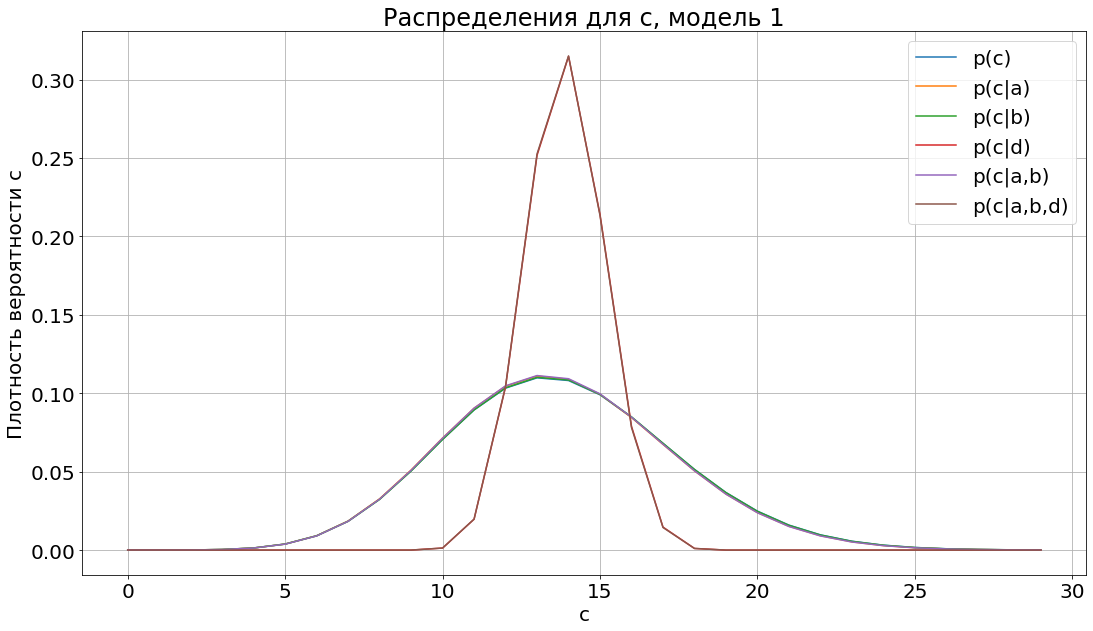

In [8]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_a_vals[:30], label='p(c|a)')
plt.plot(range_c[:30], pc_b_vals[:30], label='p(c|b)')
plt.plot(range_c[:30], pc_d_vals[:30], label='p(c|d)')
plt.plot(range_c[:30], pc_ab_vals[:30], label='p(c|a,b)')
plt.plot(range_c[:30], pc_abd_vals[:30], label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения для с, модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1.png')


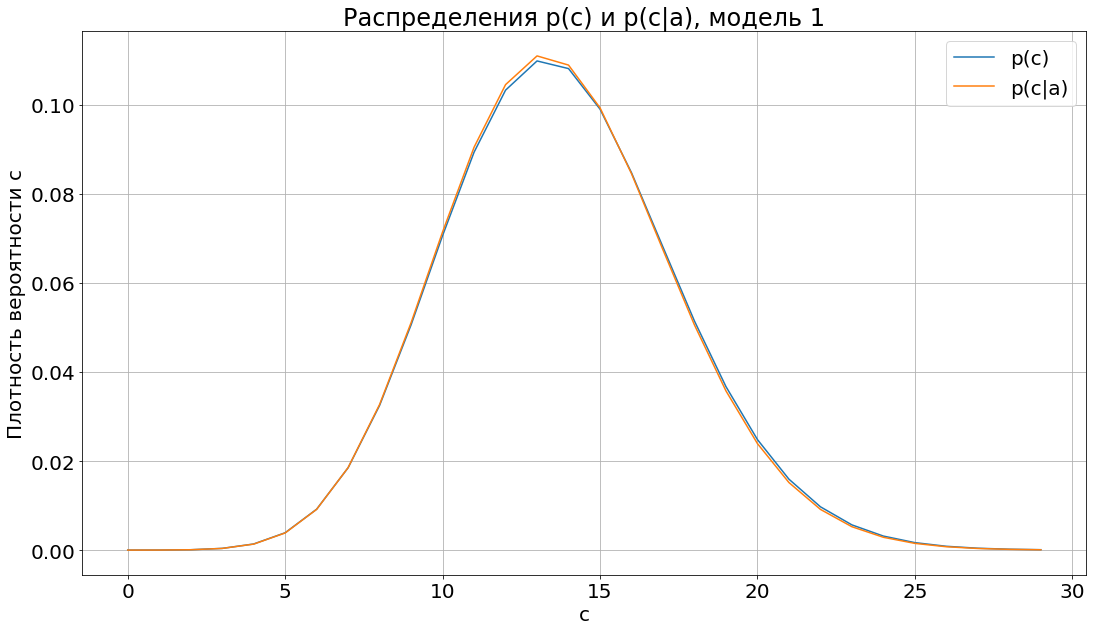

In [9]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_a_vals[:30], label='p(c|a)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|a), модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1_pc_a.png')


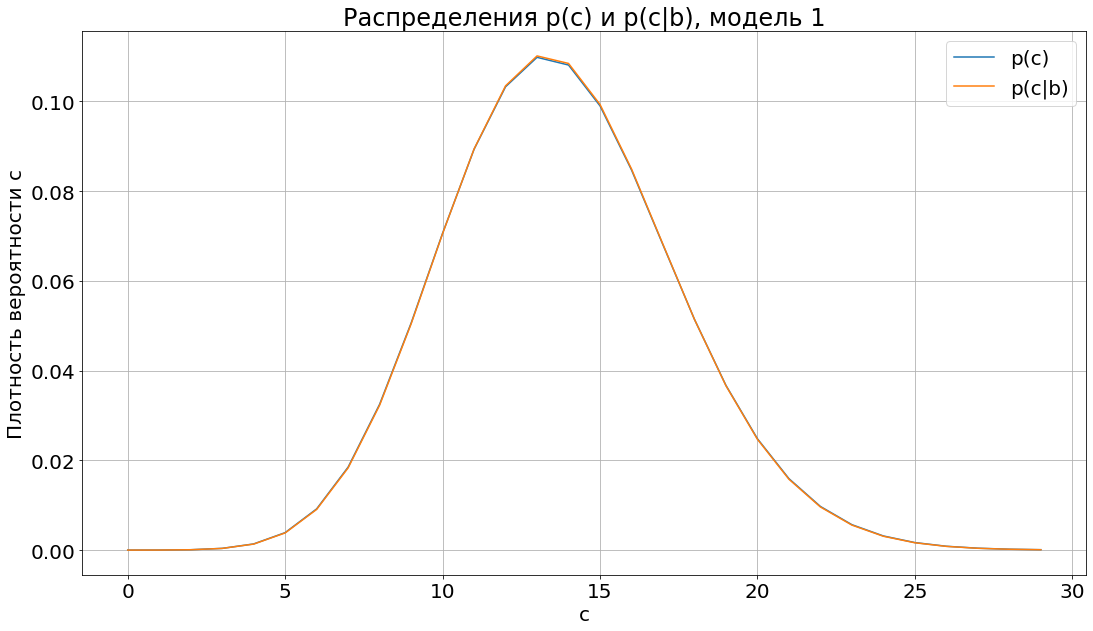

In [10]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_b_vals[:30], label='p(c|b)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|b), модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1_pc_b.png')


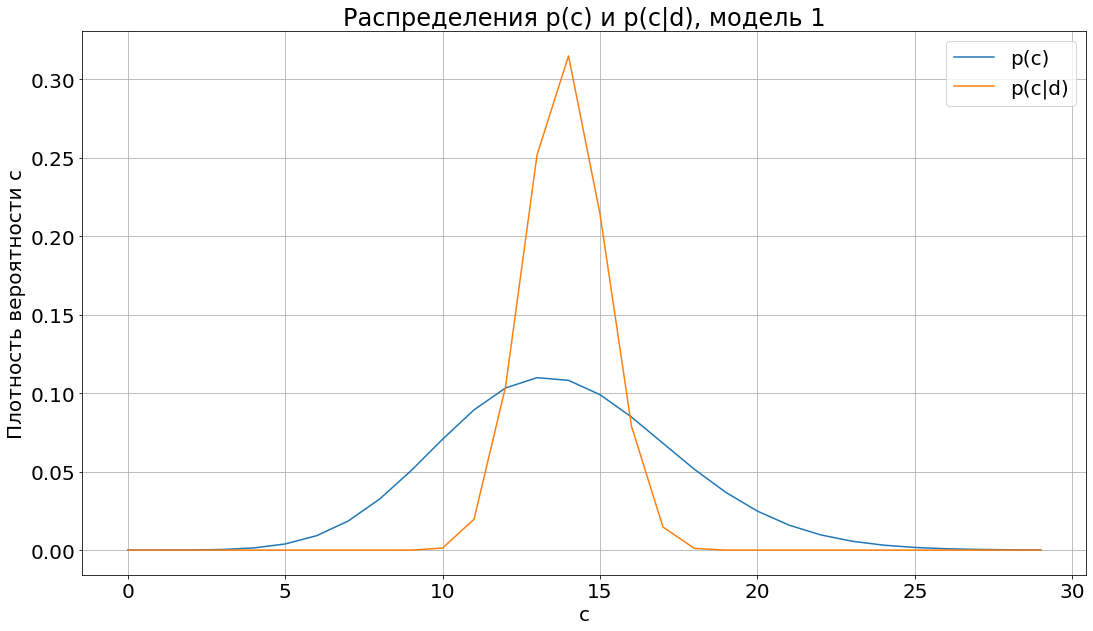

In [11]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_d_vals[:30], label='p(c|d)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|d), модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1_pc_d.png')


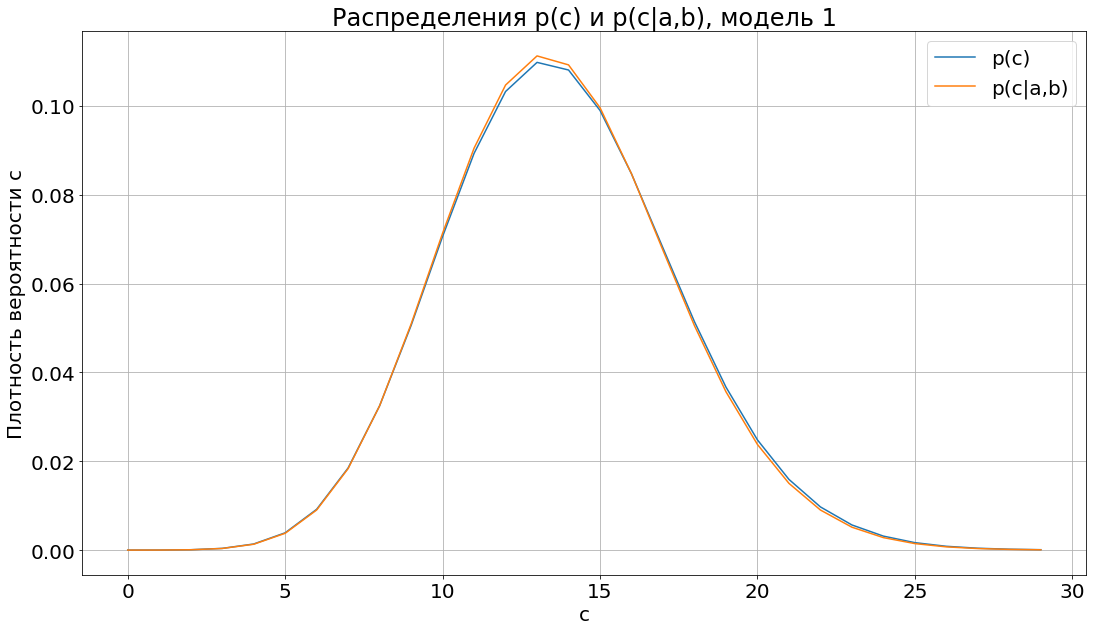

In [12]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_ab_vals[:30], label='p(c|a,b)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|a,b), модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1_pc_ab.png')


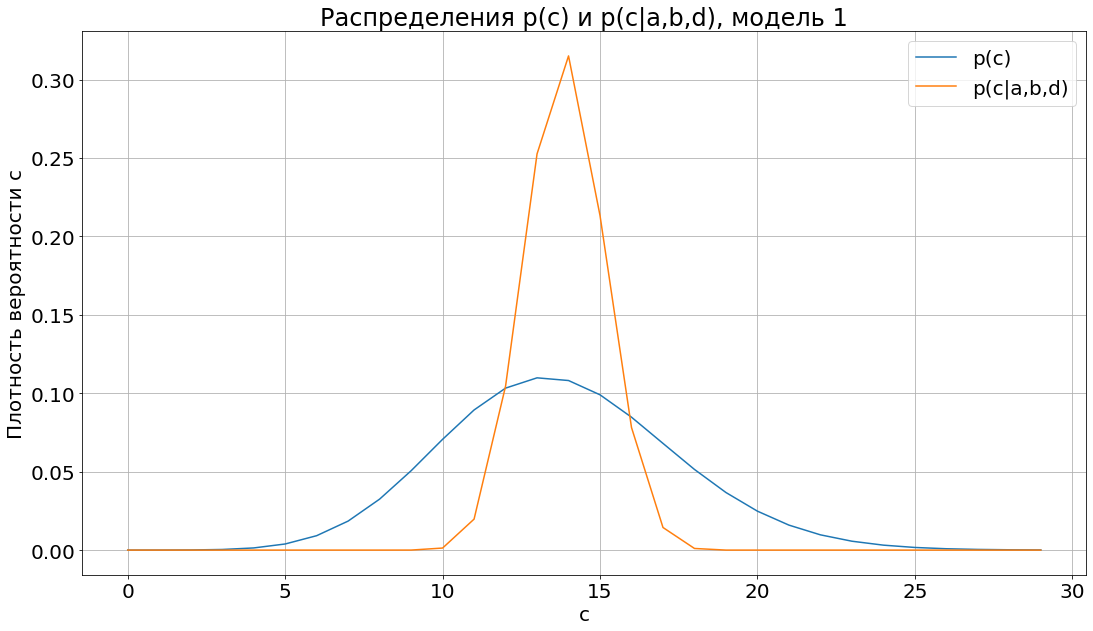

In [13]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_abd_vals[:30], label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|a,b,d), модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1_pc_abd.png')


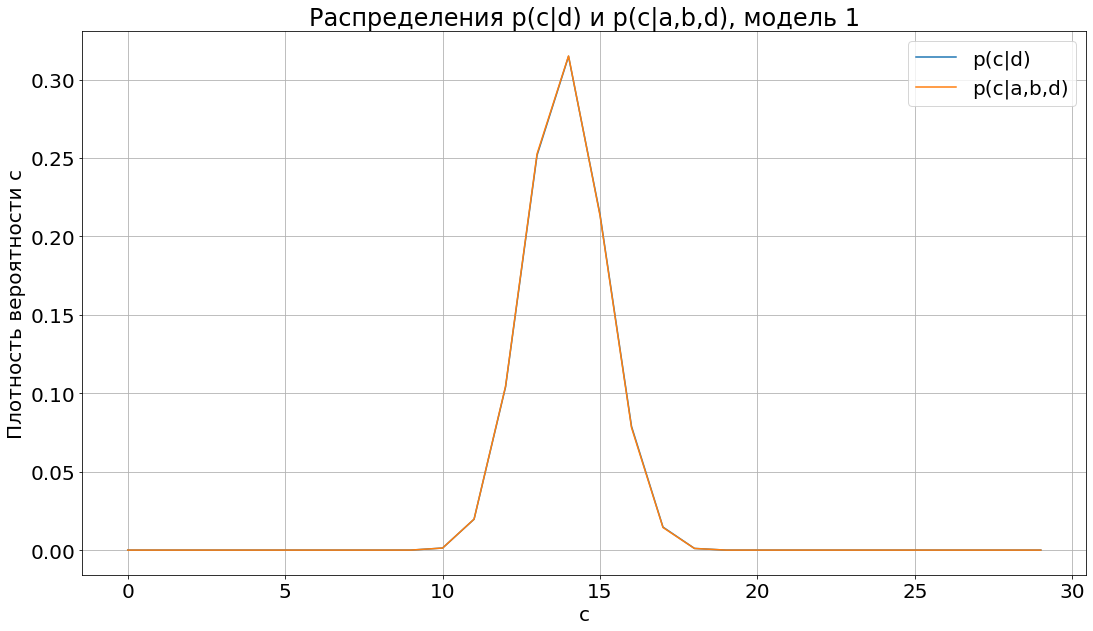

In [14]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_d_vals[:30], label='p(c|d)')
plt.plot(range_c[:30], pc_abd_vals[:30], label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(c|d) и p(c|a,b,d), модель 1')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model1_pc_d_pc_abd.png')


Матожидания и дисперсии для рапсределений с, модель 1:

In [17]:
print('Model 1:')
Ec = E(pc(params, 1)[0], range_c)
Dc = D(pc(params, 1)[0], range_c)
Ec_a = E(pc_a(Ea, params, 1)[0], range_c)
Dc_a = D(pc_a(Ea, params, 1)[0], range_c)
Ec_b = E(pc_b(Eb, params, 1)[0], range_c)
Dc_b = D(pc_b(Eb, params, 1)[0], range_c)
Ec_d = E(pc_d(Ed, params, 1)[0], range_c)
Dc_d = D(pc_d(Ed, params, 1)[0], range_c)
Ec_ab = E(pc_ab(Ea, Eb, params, 1)[0], range_c)
Dc_ab = D(pc_ab(Ea, Eb, params, 1)[0], range_c)
Ec_abd = E(pc_abd(Ea, Eb, Ed, params, 1)[0], range_c)
Dc_abd = D(pc_abd(Ea, Eb, Ed, params, 1)[0], range_c)

print(f'Ec={Ec}, Dc={Dc}')
print(f'E(c|a)={Ec_a.reshape((Ec_a.shape[0],))[0]}, D(c|a)={Dc_a.reshape((Dc_a.shape[0],))[0]}')
print(f'E(c|b)={Ec_b.reshape((Ec_b.shape[0],))[0]}, D(c|b)={Dc_b.reshape((Dc_b.shape[0],))[0]}')
print(f'E(c|d)={Ec_d.reshape((Ec_d.shape[0],))[0]}, D(c|d)={Dc_d.reshape((Dc_d.shape[0],))[0]}')
print(f'E(c|a,b)={Ec_ab.reshape((Ec_ab.shape[0],))[0]}, D(c|a,b)={Dc_ab.reshape((Dc_ab.shape[0],))[0]}')
print(f'E(c|a,b,d)={Ec_abd.reshape((Ec_abd.shape[0],))[0]}, D(c|a,b,d)={Dc_abd.reshape((Dc_abd.shape[0],))[0]}')

Model 1:
Ec=13.749999999999904, Dc=13.167500000001013
E(c|a)=13.700000000000863, D(c|a)=12.909999999988713
E(c|b)=13.750000000000348, D(c|b)=13.082499999995775
E(c|d)=13.89597059898892, D(c|d)=1.5335817006728973
E(c|a,b)=13.700000000001307, D(c|a,b)=12.824999999983504
E(c|a,b,d)=13.890872502180201, D(c|a,b,d)=1.5294245770477346


Графики распределений для с, модель 2:

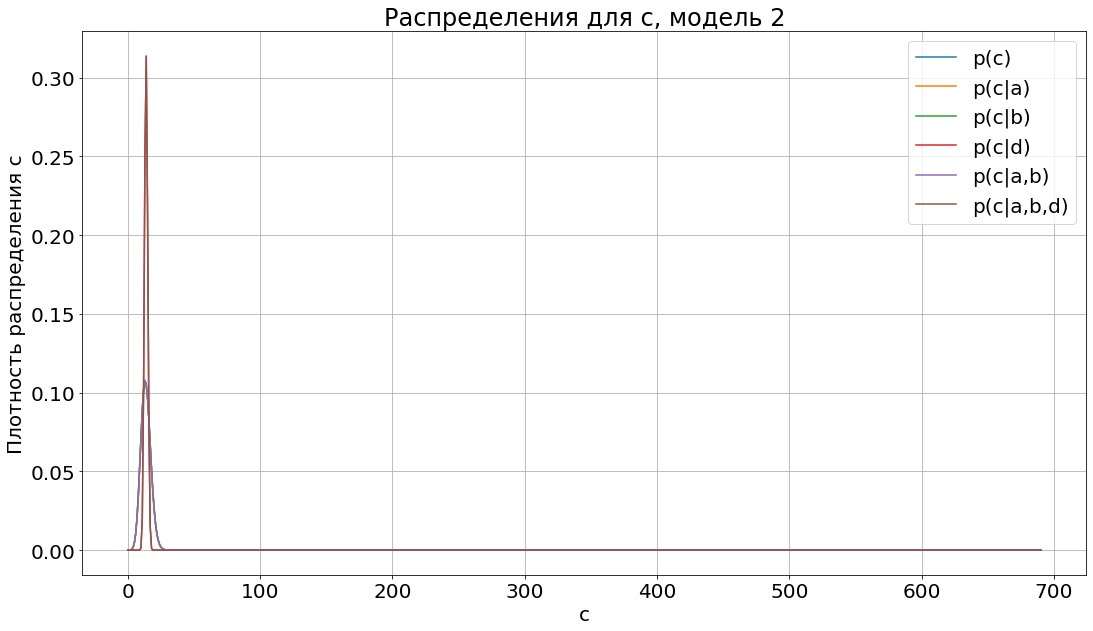

In [18]:
plt.figure(figsize=(18,10))
Ea = np.array([np.round(E(pa(params, 2)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 2)[0], range_b), 0).astype(int)])
Ec = np.array([np.round(E(pc(params, 2)[0], range_c), 0).astype(int)])
Ed = np.array([np.round(E(pd(params, 2)[0], range_d), 0).astype(int)])

pc_vals = pc(params, 2)[0]
pc_a_vals = pc_a(Ea, params, 2)[0]
pc_b_vals = pc_b(Eb, params, 2)[0]
pc_d_vals = pc_d(Ed, params, 2)[0]
pc_ab_vals = pc_ab(Ea, Eb, params, 2)[0].reshape((range_c.shape[0], 1))
pc_abd_vals = pc_abd(Ea, Eb, Ed, params, 2)[0].reshape((range_c.shape[0], 1))

plt.plot(range_c, pc_vals, label='p(c)')
plt.plot(range_c, pc_a_vals, label='p(c|a)')
plt.plot(range_c, pc_b_vals, label='p(c|b)')
plt.plot(range_c, pc_d_vals, label='p(c|d)')
plt.plot(range_c, pc_ab_vals, label='p(c|a,b)')
plt.plot(range_c, pc_abd_vals, label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения для с, модель 2')
plt.xlabel('c')
plt.ylabel('Плотность распределения с')
plt.savefig('model2_full.png')


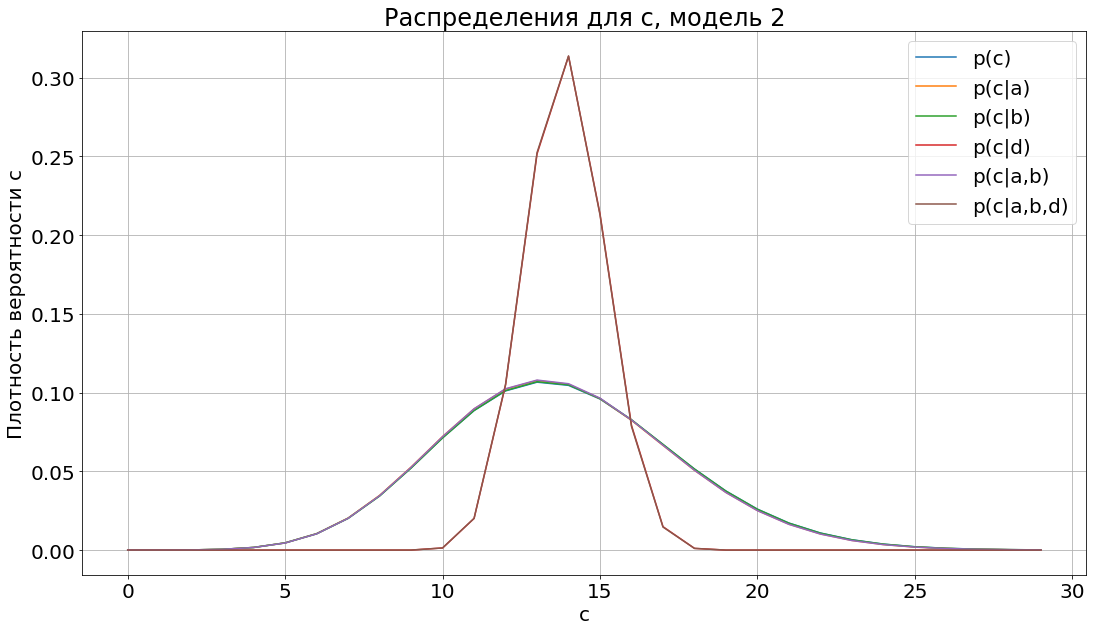

In [19]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_a_vals[:30], label='p(c|a)')
plt.plot(range_c[:30], pc_b_vals[:30], label='p(c|b)')
plt.plot(range_c[:30], pc_d_vals[:30], label='p(c|d)')
plt.plot(range_c[:30], pc_ab_vals[:30], label='p(c|a,b)')
plt.plot(range_c[:30], pc_abd_vals[:30], label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения для с, модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2.png')


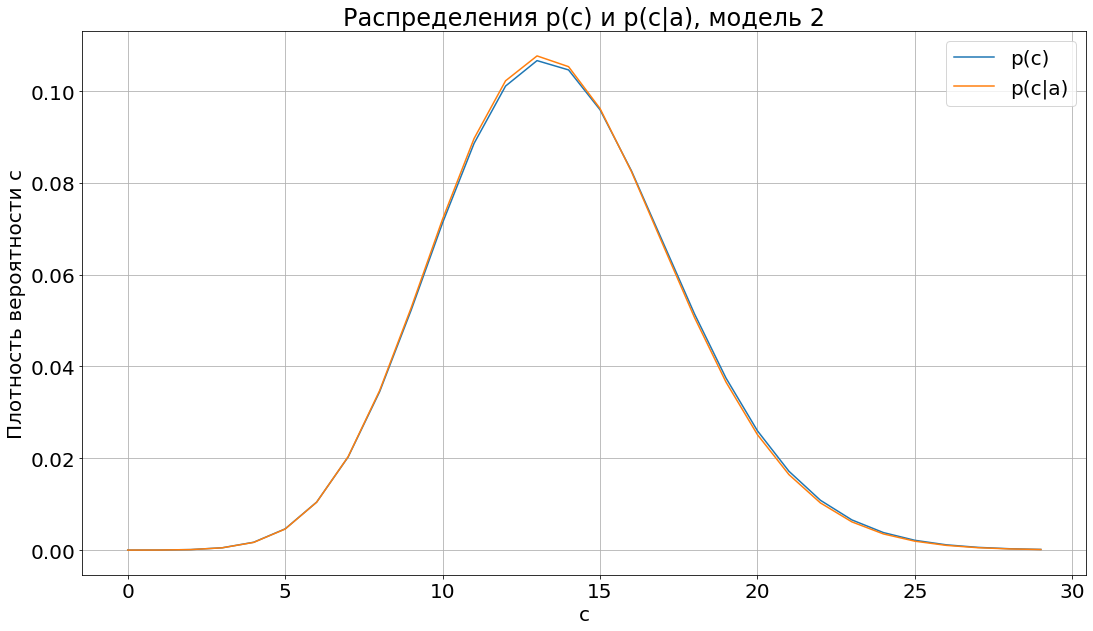

In [20]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_a_vals[:30], label='p(c|a)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|a), модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2_pc_a.png')


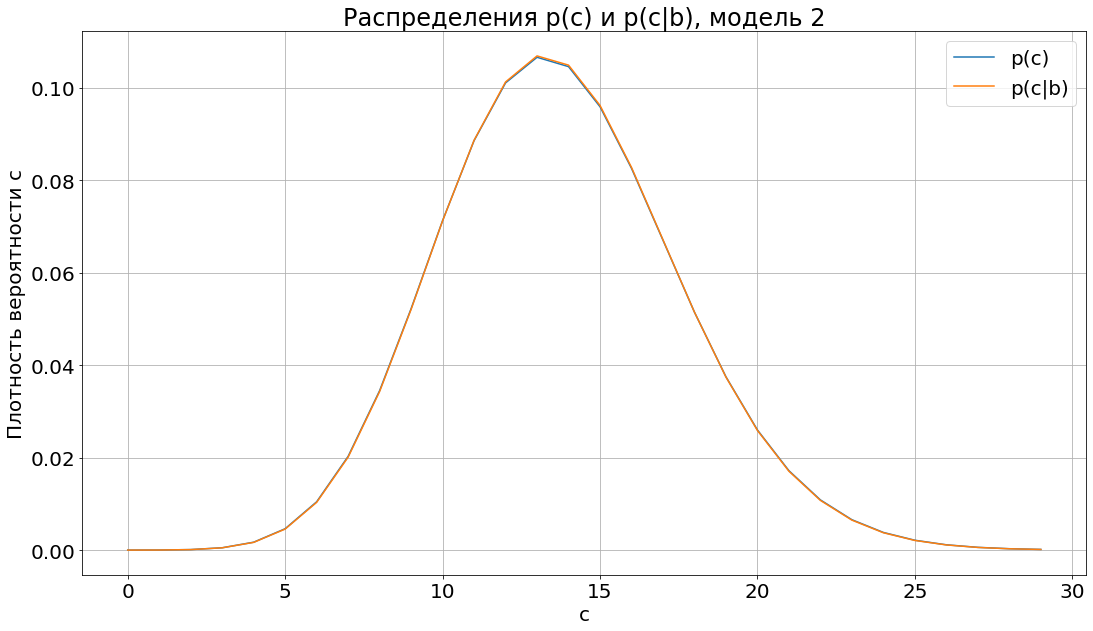

In [21]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_b_vals[:30], label='p(c|b)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|b), модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2_pc_b.png')


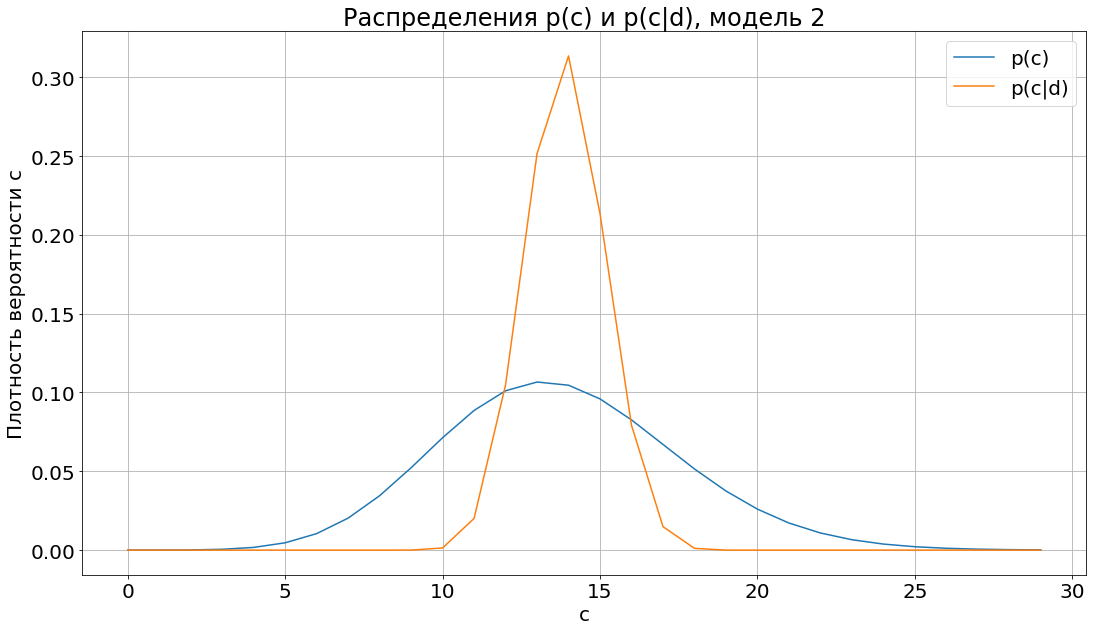

In [22]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_d_vals[:30], label='p(c|d)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|d), модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2_pc_d.png')


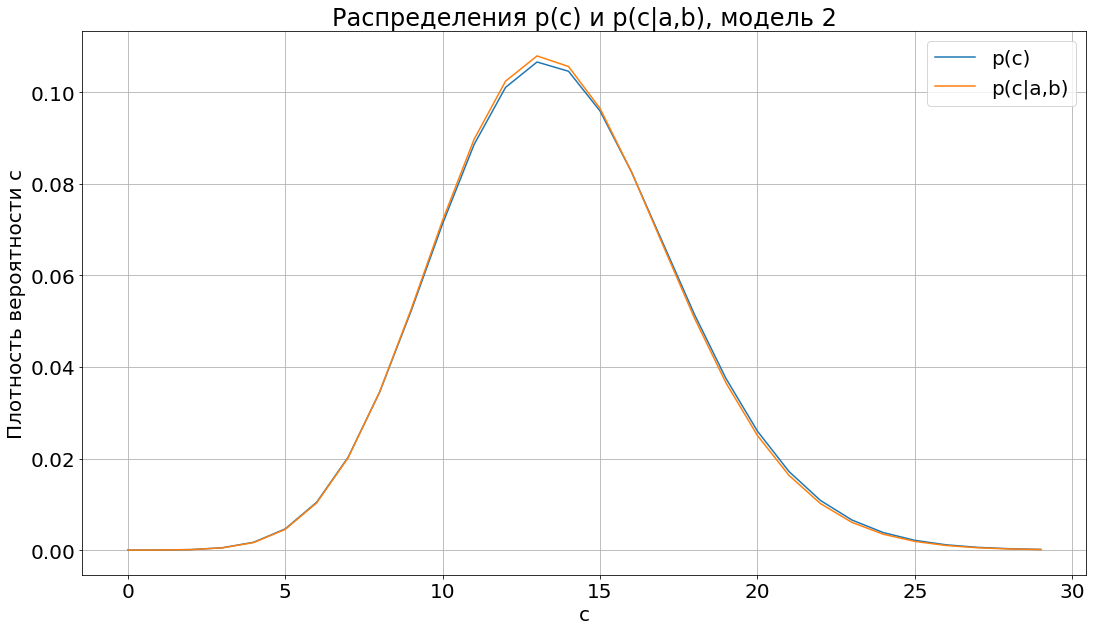

In [23]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_ab_vals[:30], label='p(c|a,b)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|a,b), модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2_pc_ab.png')


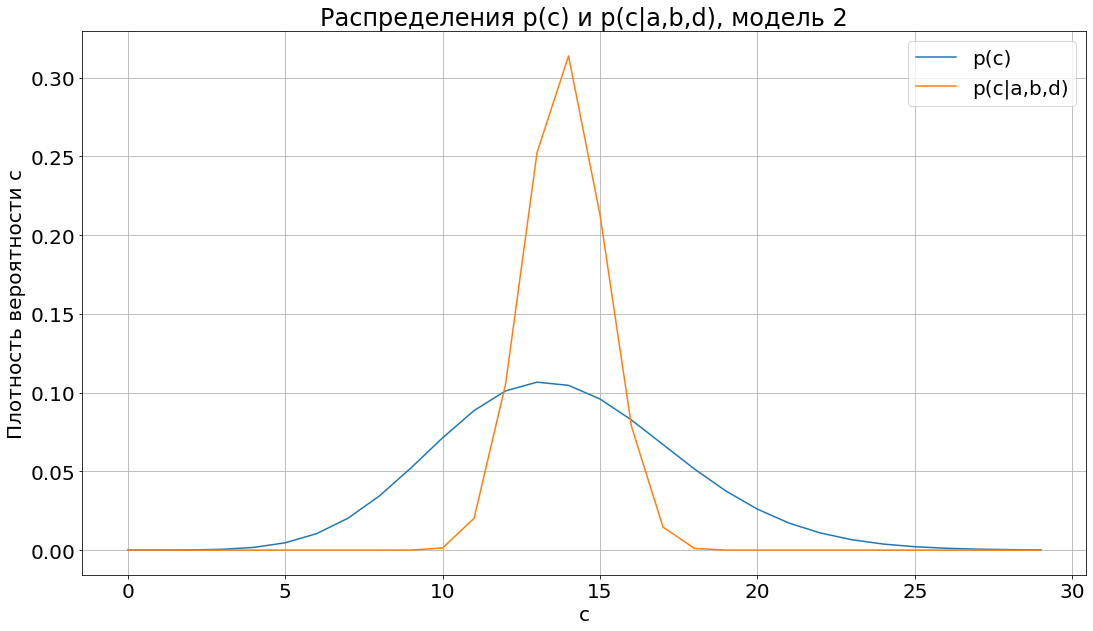

In [24]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_vals[:30], label='p(c)')
plt.plot(range_c[:30], pc_abd_vals[:30], label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(с) и p(c|a,b,d), модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2_pc_abd.png')


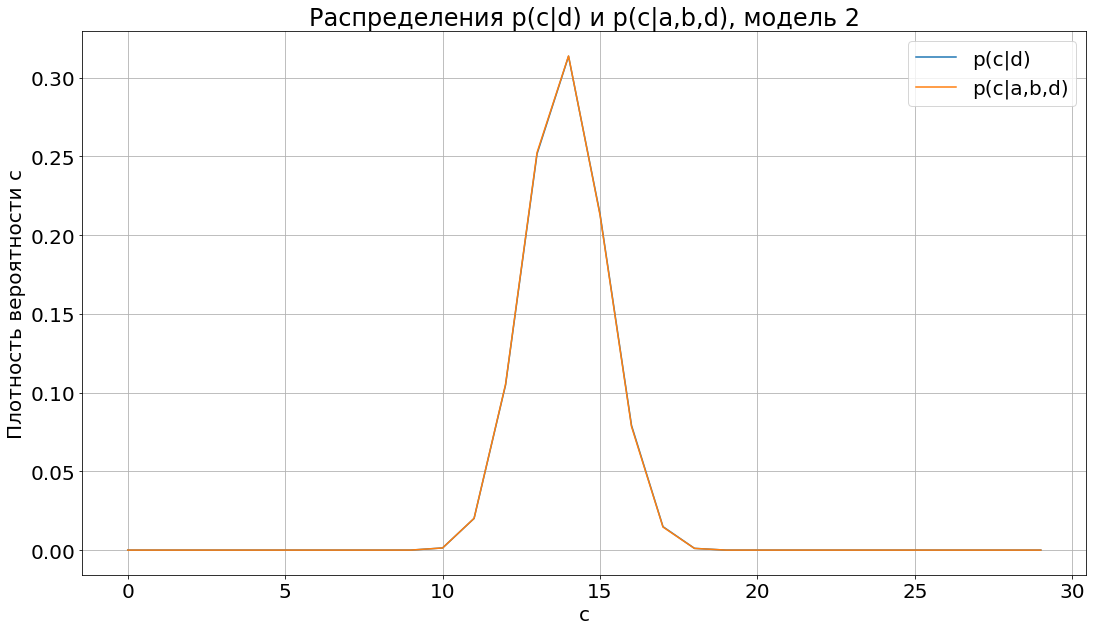

In [25]:
plt.figure(figsize=(18,10))

plt.plot(range_c[:30], pc_d_vals[:30], label='p(c|d)')
plt.plot(range_c[:30], pc_abd_vals[:30], label='p(c|a,b,d)')

plt.grid(True)
plt.legend()
plt.title('Распределения p(c|d) и p(c|a,b,d), модель 2')
plt.xlabel('c')
plt.ylabel('Плотность вероятности с')
plt.savefig('model2_pc_d_pc_abd.png')


In [26]:
print('Model 2:')
Ec = E(pc(params, 2)[0], range_c)
Dc = D(pc(params, 2)[0], range_c)
Ec_a = E(pc_a(Ea, params, 2)[0], range_c)
Dc_a = D(pc_a(Ea, params, 2)[0], range_c)
Ec_b = E(pc_b(Eb, params, 2)[0], range_c)
Dc_b = D(pc_b(Eb, params, 2)[0], range_c)
Ec_d = E(pc_d(Ed, params, 2)[0], range_c)
Dc_d = D(pc_d(Ed, params, 2)[0], range_c)
Ec_ab = E(pc_ab(Ea, Eb, params, 2)[0], range_c)
Dc_ab = D(pc_ab(Ea, Eb, params, 2)[0], range_c)
Ec_abd = E(pc_abd(Ea, Eb, Ed, params, 2)[0], range_c)
Dc_abd = D(pc_abd(Ea, Eb, Ed, params, 2)[0], range_c)

print(f'Ec={Ec}, Dc={Dc}')
print(f'E(c|a)={Ec_a.reshape((Ec_a.shape[0],))[0]}, D(c|a)={Dc_a.reshape((Dc_a.shape[0],))[0]}')
print(f'E(c|b)={Ec_b.reshape((Ec_b.shape[0],))[0]}, D(c|b)={Dc_b.reshape((Dc_b.shape[0],))[0]}')
print(f'E(c|d)={Ec_d.reshape((Ec_d.shape[0],))[0]}, D(c|d)={Dc_d.reshape((Dc_d.shape[0],))[0]}')
print(f'E(c|a,b)={Ec_ab.reshape((Ec_ab.shape[0],))[0]}, D(c|a,b)={Dc_ab.reshape((Dc_ab.shape[0],))[0]}')
print(f'E(c|a,b,d)={Ec_abd.reshape((Ec_abd.shape[0],))[0]}, D(c|a,b,d)={Dc_abd.reshape((Dc_abd.shape[0],))[0]}')

Model 2:
Ec=13.75, Dc=14.047500000000014
E(c|a)=13.699999999999982, D(c|a)=13.785000000000252
E(c|b)=13.750000000000002, D(c|b)=13.962499999999977
E(c|d)=13.893833892236305, D(c|d)=1.5439433290956117
E(c|a,b)=13.699999999999987, D(c|a,b)=13.70000000000013
E(c|a,b,d)=13.888971061749594, D(c|a,b,d)=1.5402285403124267


Сравнение дисперсий для p(c|a), p(c|b), p(c|d) для всех значений параметров, модель 1:

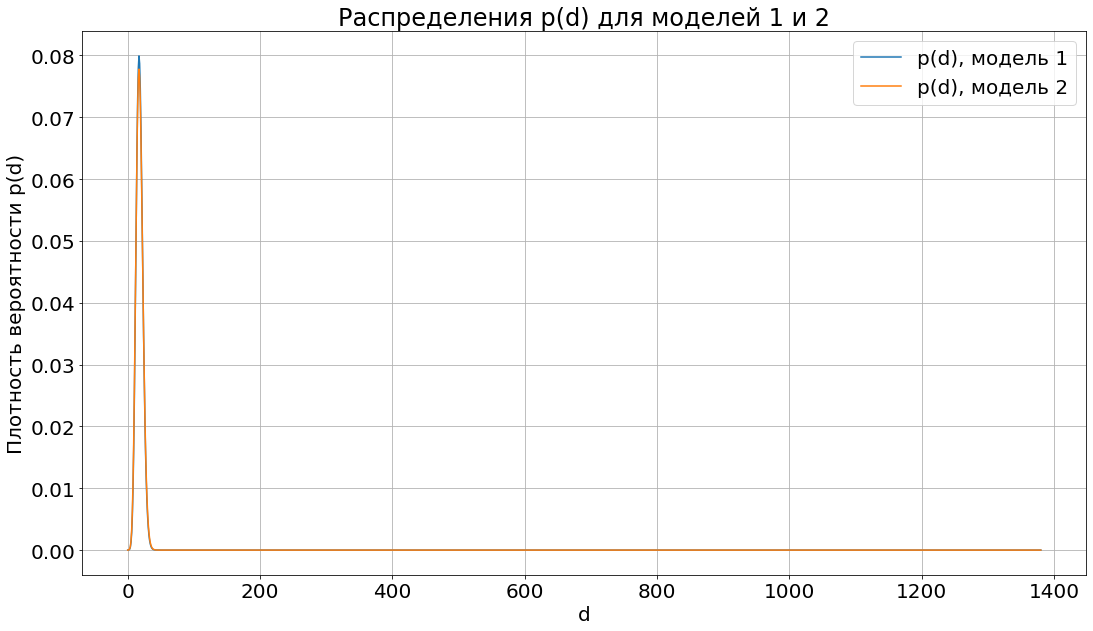

In [21]:
plt.figure(figsize=(18,10))

pd_vals_1 = pd(params, 1)[0]
pd_vals_2 = pd(params, 2)[0]

plt.plot(range_d, pd_vals_1, label='p(d), модель 1')
plt.plot(range_d, pd_vals_2, label='p(d), модель 2')

plt.grid(True)
plt.legend()
plt.title('Распределения p(d) для моделей 1 и 2')
plt.xlabel('d')
plt.ylabel('Плотность вероятности p(d)')
plt.savefig('pd.png')


In [28]:
print('Model 1:')

Dc_a_vals = D(pc_a(range_a, params, 1)[0], range_c)
Dc_b_vals = D(pc_b(range_b, params, 1)[0], range_c)
Dc_d_vals = D(pc_d(range_d, params, 1)[0], range_c)

print(f'min(D(c|a))={Dc_a_vals.min()}')
print(f'max(D(c|a))={Dc_a_vals.max()}')
print(f'min(D(c|b))={Dc_b_vals.min()}')
print(f'max(D(c|b))={Dc_b_vals.max()}')
print(f'min(D(c|d))={Dc_d_vals.min()}')
print(f'max(D(c|d))={Dc_d_vals.max()}')

Model 1:
min(D(c|a))=12.28000000000145
max(D(c|a))=13.630000000005339
min(D(c|b))=12.587500000007026
max(D(c|b))=13.577500000046342
min(D(c|d))=0.0
max(D(c|d))=10.298690905139665


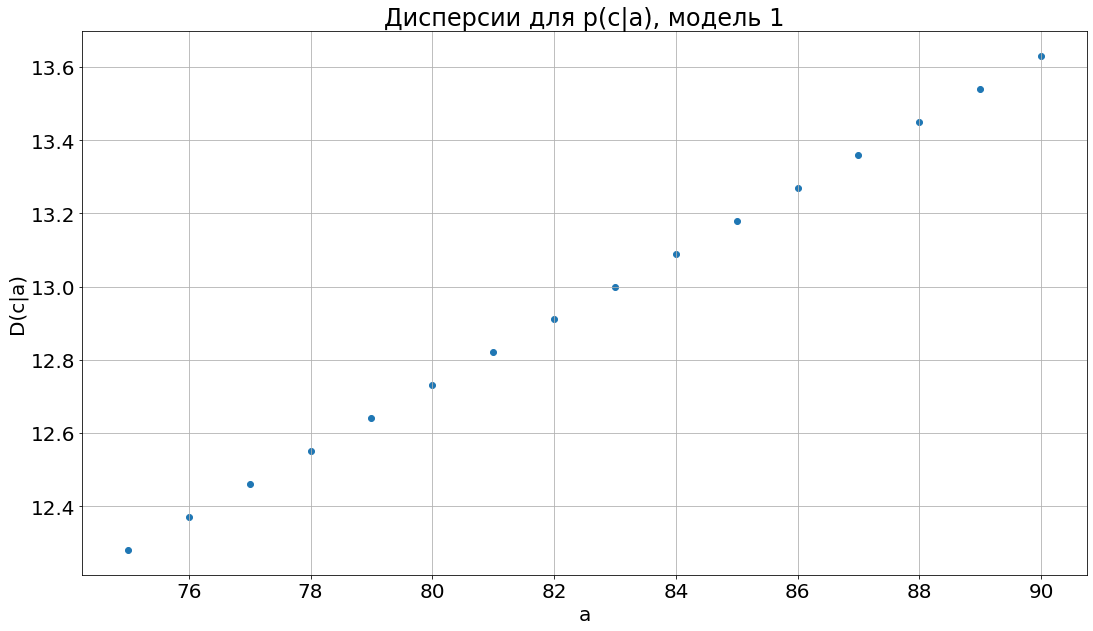

In [30]:
plt.figure(figsize=(18, 10))

plt.scatter(range_a, Dc_a_vals)

plt.title('Дисперсии для p(c|a), модель 1')
plt.ylabel('D(c|a)')
plt.xlabel('a')
plt.grid(True)
plt.savefig('model1_var_a.png')

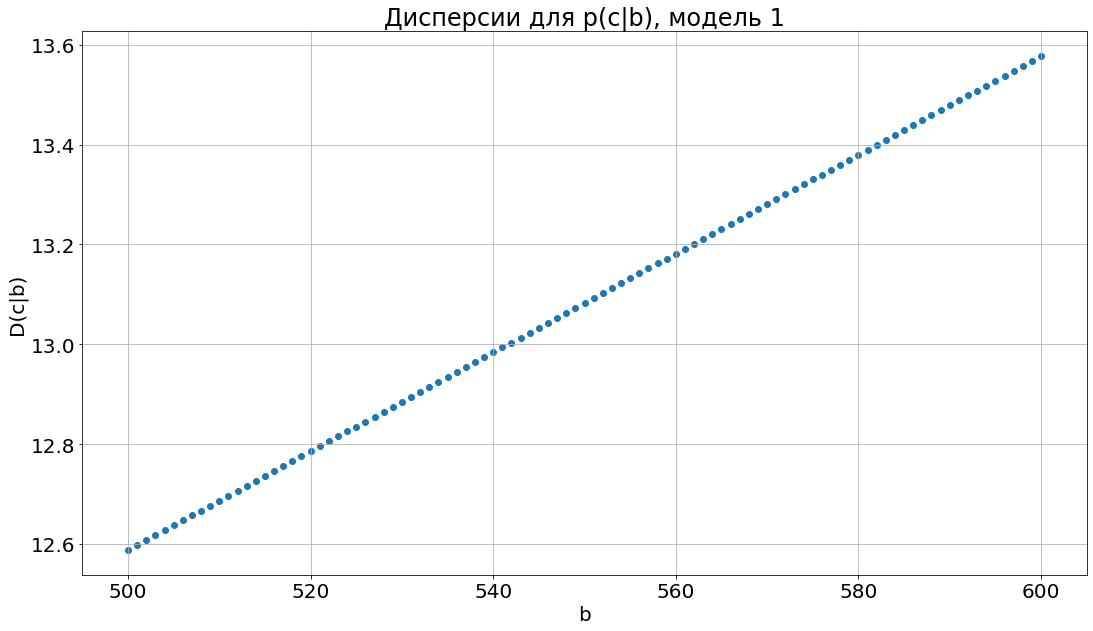

In [31]:
plt.figure(figsize=(18, 10))

plt.scatter(range_b, Dc_b_vals)

plt.title('Дисперсии для p(c|b), модель 1')
plt.ylabel('D(c|b)')
plt.xlabel('b')
plt.grid(True)
plt.savefig('model1_var_b.png')

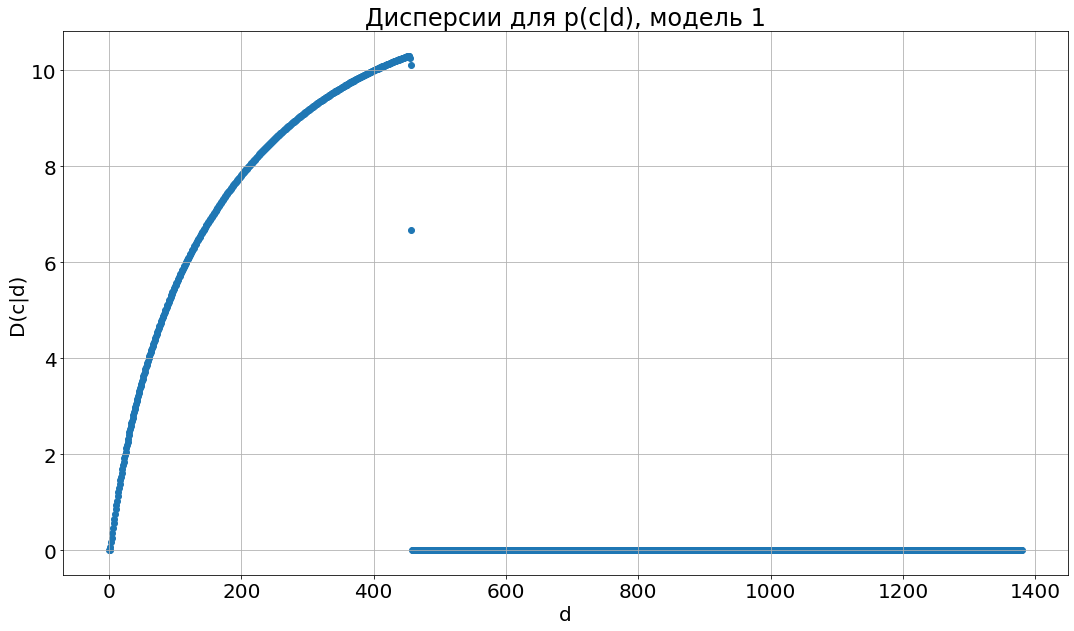

In [32]:
plt.figure(figsize=(18, 10))

plt.scatter(range_d, Dc_d_vals)

plt.title('Дисперсии для p(c|d), модель 1')
plt.ylabel('D(c|d)')
plt.xlabel('d')
plt.grid(True)
plt.savefig('model1_var_d.png')

Сравнение дисперсий для p(c|a), p(c|b), p(c|d) для всех значений параметров, модель 2:

In [33]:
print('Model 2:')

Dc_a_vals = D(pc_a(range_a, params, 2)[0], range_c)
Dc_b_vals = D(pc_b(range_b, params, 2)[0], range_c)
Dc_d_vals = D(pc_d(range_d, params, 2)[0], range_c)


print(f'min(D(c|a))={Dc_a_vals.min()}')
print(f'max(D(c|a))={Dc_a_vals.max()}')
print(f'min(D(c|b))={Dc_b_vals.min()}')
print(f'max(D(c|b))={Dc_b_vals.max()}')
print(f'min(D(c|d))={Dc_d_vals.min()}')
print(f'max(D(c|d))={Dc_d_vals.max()}')



Model 2:
min(D(c|a))=13.08500000000015
max(D(c|a))=14.584999999999752
min(D(c|b))=13.462500000000176
max(D(c|b))=14.462500000000148
min(D(c|d))=0.0
max(D(c|d))=17.009807773531065


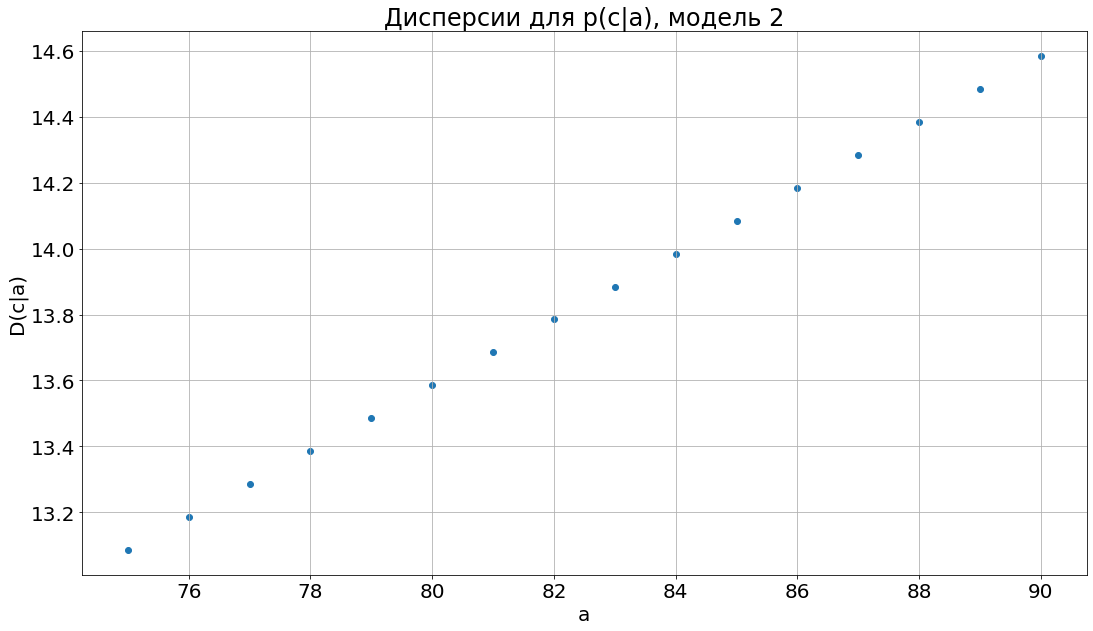

In [34]:
plt.figure(figsize=(18, 10)) 

plt.scatter(range_a, Dc_a_vals)

plt.title('Дисперсии для p(с|a), модель 2')
plt.ylabel('D(c|a)')
plt.xlabel('a')
plt.grid(True)
plt.savefig('model2_var_a.png')

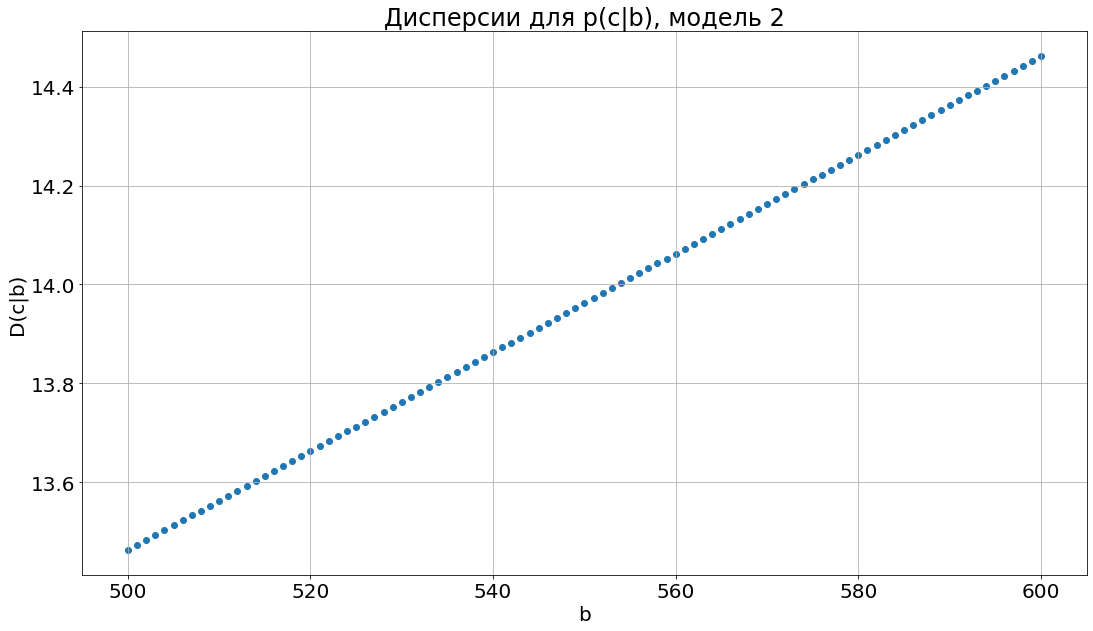

In [35]:
plt.figure(figsize=(18, 10)) 

plt.scatter(range_b, Dc_b_vals)

plt.title('Дисперсии для p(с|b), модель 2')
plt.ylabel('D(c|b)')
plt.xlabel('b')
plt.grid(True)
plt.savefig('model2_var_b.png')

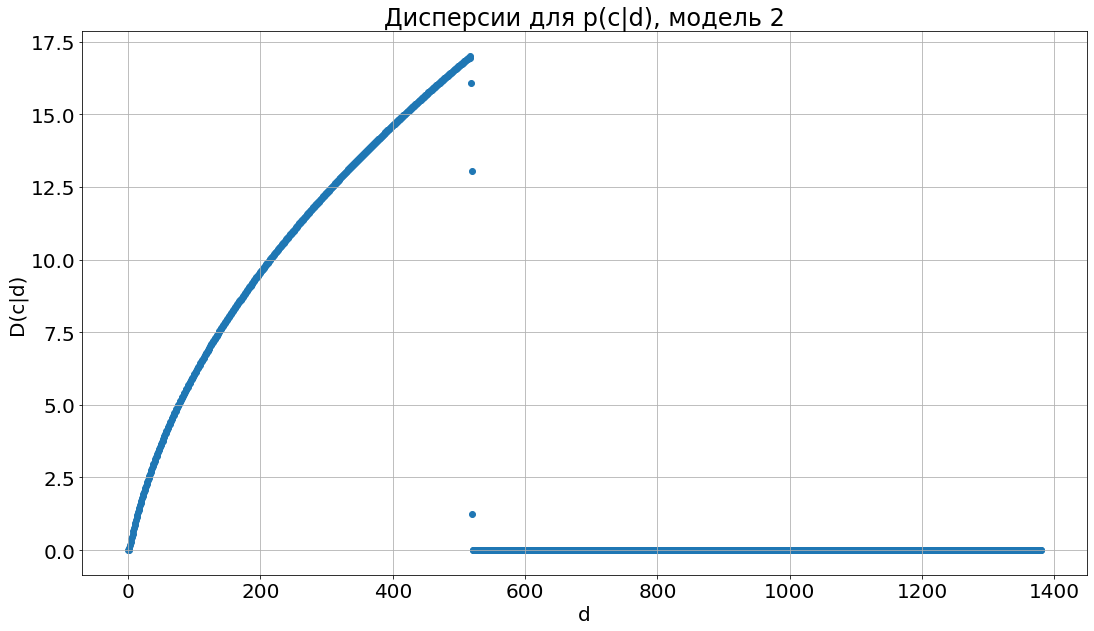

In [36]:
plt.figure(figsize=(18, 10)) 

plt.scatter(range_d, Dc_d_vals)

plt.title('Дисперсии для p(с|d), модель 2')
plt.ylabel('D(c|d)')
plt.xlabel('d')
plt.grid(True)
plt.savefig('model2_var_d.png')

Линейная разделимость множеств $\{(a,b)|\mathbb{D}(c|b)<\mathbb{D}(c|a)\}$, $\{(a,b)|\mathbb{D}(c|b)\geq\mathbb{D}(c|a)\}$, модель 1:

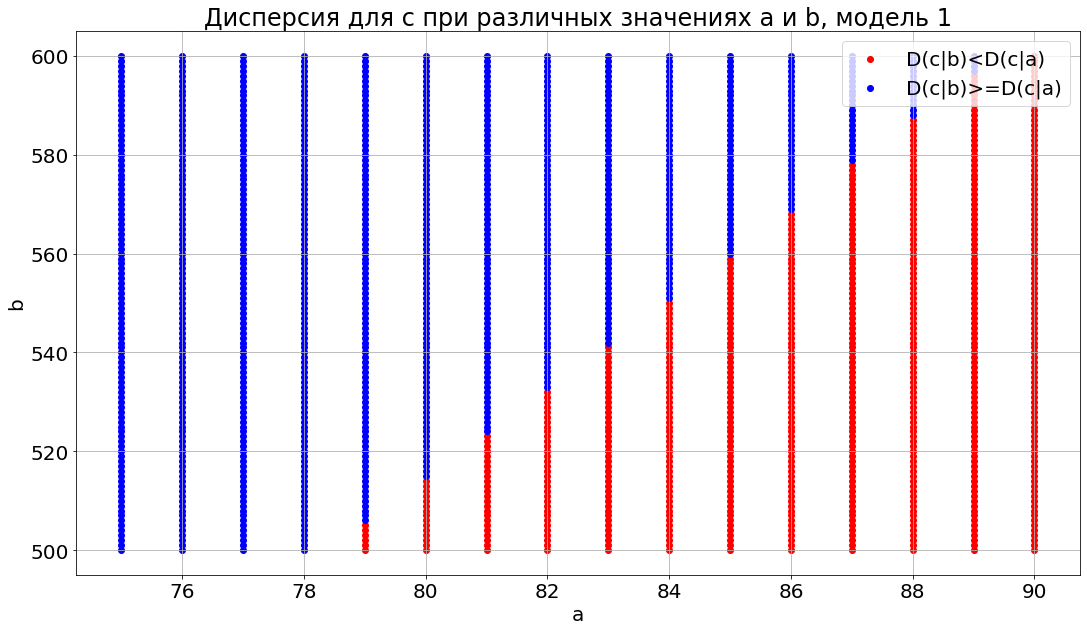

In [37]:
plt.figure(figsize=(18, 10))
Dc_a_vals = D(pc_a(range_a, params, 1)[0], range_c)
Dc_b_vals = D(pc_b(range_b, params, 1)[0], range_c)
Dc_d_vals = D(pc_d(range_d, params, 1)[0], range_c)

b_less_a = []
b_geq_a = []

for i in range(range_a.shape[0]):
    for j in range(range_b.shape[0]):
        if Dc_b_vals[j] < Dc_a_vals[i]:
            b_less_a.append((range_a[i], range_b[j]))
        else:
            b_geq_a.append((range_a[i], range_b[j]))

b_less_a = np.array(b_less_a)
b_geq_a = np.array(b_geq_a)

plt.scatter(b_less_a[:, 0], b_less_a[:, 1], label='D(c|b)<D(c|a)', color='r')
plt.scatter(b_geq_a[:, 0], b_geq_a[:, 1], label='D(c|b)>=D(c|a)', color='b')

plt.title('Дисперсия для с при различных значениях a и b, модель 1')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.legend()
plt.savefig('model1_separability.png')




Обучение линейного классификатора для разбиения множества точек, модель 1:

In [38]:
X = np.zeros((range_a.shape[0] * range_b.shape[0], 2))
y = np.zeros((range_a.shape[0] * range_b.shape[0], 1))
row = 0
for i in range(range_a.shape[0]):
    for j in range(range_b.shape[0]):
        if Dc_b_vals[j] < Dc_a_vals[i]:
            y[row] = 1
        else:
            y[row] = 0
        X[row, 0] = range_a[i]
        X[row, 1] = range_b[j]
        row += 1

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5, shuffle=True)

OOF_data = None
OOF_targets = None
OOF_scores = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(y_test, pred)
    OOF_scores.append(score)
    if OOF_data is None:
        OOF_data = X_test
        OOF_targets = y_test
    else:
        OOF_data = np.vstack((OOF_data, X_test))
        OOF_targets = np.vstack((OOF_targets, y_test))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

In [40]:
print(f'OOF accuracy: {np.array(OOF_scores).mean()}')

OOF accuracy: 0.9981443259565035


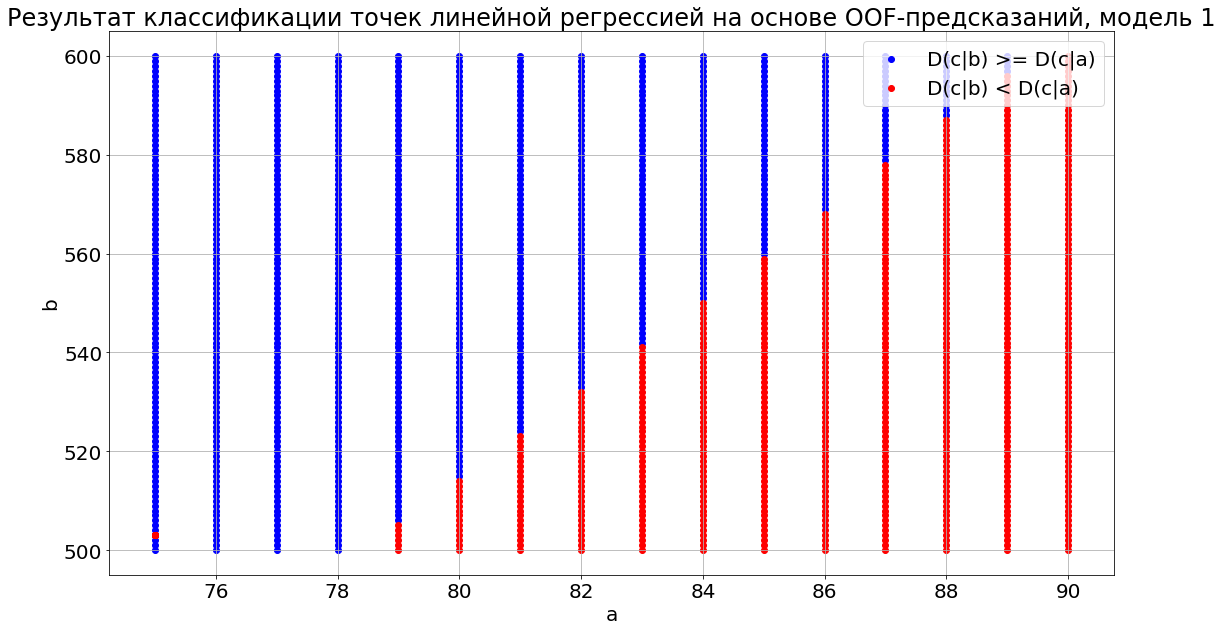

In [41]:
plt.figure(figsize=(18, 10))
idx0 = np.argwhere(OOF_targets == 0)
idx1 = np.argwhere(OOF_targets == 1)

plt.scatter(OOF_data[idx0, 0], OOF_data[idx0, 1], label='D(c|b) >= D(c|a)', color='b')
plt.scatter(OOF_data[idx1, 0], OOF_data[idx1, 1], label='D(c|b) < D(c|a)', color='r')

plt.title('Результат классификации точек линейной регрессией на основе OOF-предсказаний, модель 1')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.legend()
plt.savefig('model1_linreg.png')

Линейная разделимость множеств $\{(a,b)|\mathbb{D}(c|b)<\mathbb{D}(c|a)\}$, $\{(a,b)|\mathbb{D}(c|b)\geq\mathbb{D}(c|a)\}$, модель 2:

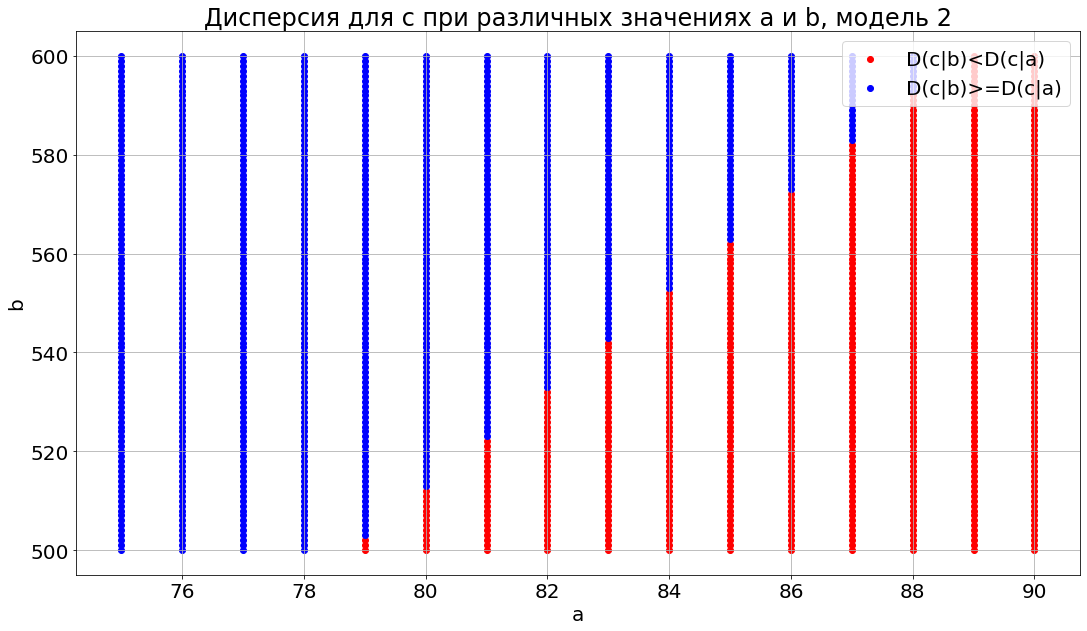

In [42]:
plt.figure(figsize=(18, 10))
Dc_a_vals = D(pc_a(range_a, params, 2)[0], range_c)
Dc_b_vals = D(pc_b(range_b, params, 2)[0], range_c)
Dc_d_vals = D(pc_d(range_d, params, 2)[0], range_c)

b_less_a = []
b_geq_a = []

for i in range(range_a.shape[0]):
    for j in range(range_b.shape[0]):
        if Dc_b_vals[j] < Dc_a_vals[i]:
            b_less_a.append((range_a[i], range_b[j]))
        else:
            b_geq_a.append((range_a[i], range_b[j]))

b_less_a = np.array(b_less_a)
b_geq_a = np.array(b_geq_a)

plt.scatter(b_less_a[:, 0], b_less_a[:, 1], label='D(c|b)<D(c|a)', color='r')
plt.scatter(b_geq_a[:, 0], b_geq_a[:, 1], label='D(c|b)>=D(c|a)', color='b')

plt.title('Дисперсия для с при различных значениях a и b, модель 2')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.legend()
plt.savefig('model2_separability.png')




Обучение линейного классификатора для разбиения множества точек, модель 2:

In [43]:
X = np.zeros((range_a.shape[0] * range_b.shape[0], 2))
y = np.zeros((range_a.shape[0] * range_b.shape[0], 1))
row = 0
for i in range(range_a.shape[0]):
    for j in range(range_b.shape[0]):
        if Dc_b_vals[j] < Dc_a_vals[i]:
            y[row] = 1
        else:
            y[row] = 0
        X[row, 0] = range_a[i]
        X[row, 1] = range_b[j]
        row += 1

In [46]:
kf = KFold(n_splits=5, shuffle=True)

OOF_data = None
OOF_targets = None
OOF_scores = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(y_test, pred)
    OOF_scores.append(score)
    if OOF_data is None:
        OOF_data = X_test
        OOF_targets = y_test
    else:
        OOF_data = np.vstack((OOF_data, X_test))
        OOF_targets = np.vstack((OOF_targets, y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

In [47]:
print(f'OOF accuracy: {np.array(OOF_scores).mean()}')

OOF accuracy: 0.9987616099071207


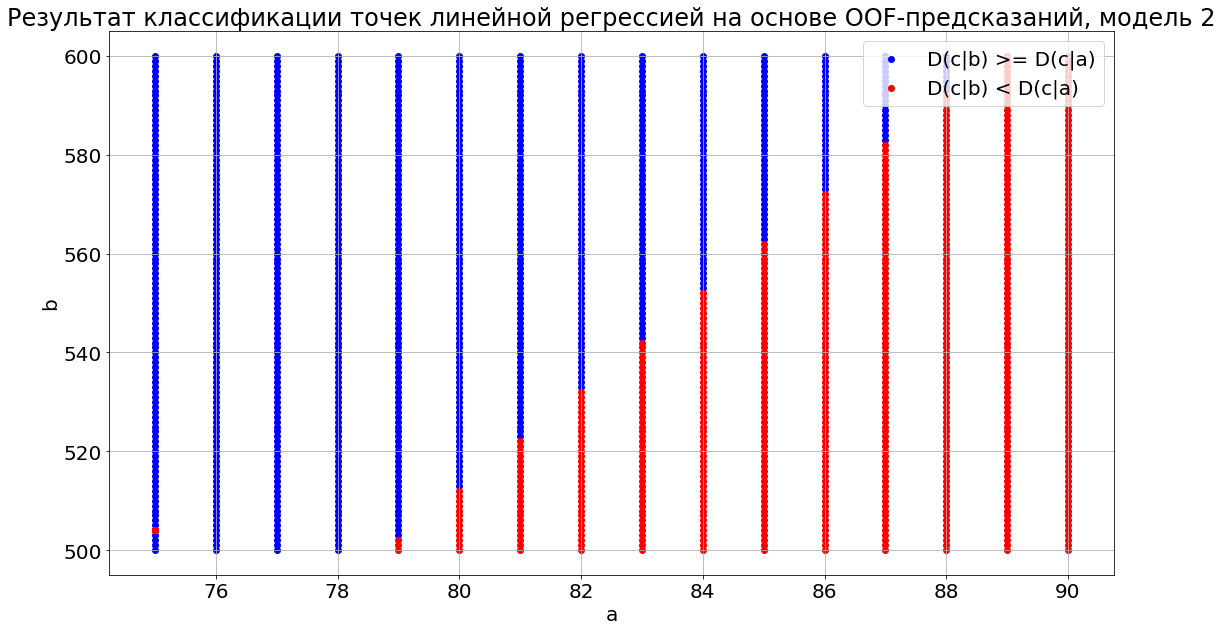

In [48]:
plt.figure(figsize=(18, 10))
idx0 = np.argwhere(OOF_targets == 0)
idx1 = np.argwhere(OOF_targets == 1)

plt.scatter(OOF_data[idx0, 0], OOF_data[idx0, 1], label='D(c|b) >= D(c|a)', color='b')
plt.scatter(OOF_data[idx1, 0], OOF_data[idx1, 1], label='D(c|b) < D(c|a)', color='r')

plt.title('Результат классификации точек линейной регрессией на основе OOF-предсказаний, модель 2')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.legend()
plt.savefig('model2_linreg.png')

Временные замеры реализаций распределений для обеих моделей:

In [50]:
print('Model 1, p(c)')
%timeit res = pc(params, 1)

Model 1, p(c)
107 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
print('Model 2, p(c)')
%timeit res = pc(params, 2)

Model 2, p(c)
109 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Далее проведем замеры при параметрах, равным матожиданиям их априорных распределений, и на полных наборах значений параметров 

In [52]:
Ea = np.array([np.round(E(pa(params, 1)[0], range_a), 0).astype(int)])
print('Model 1, p(c|a=Ea)')
%timeit res = pc_a(Ea, params, 1)

Model 1, p(c|a=Ea)
74.2 ms ± 86.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
print('Model 1, p(c|a)')
%timeit res = pc_a(range_a, params, 1)

Model 1, p(c|a)
112 ms ± 2.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
Ea = np.array([np.round(E(pa(params, 2)[0], range_a), 0).astype(int)])
print('Model 2, p(c|a=Ea)')
%timeit res = pc_a(Ea, params, 2)

Model 2, p(c|a=Ea)
75.4 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
print('Model 2, p(c|a)')
%timeit res = pc_a(range_a, params, 2)

Model 2, p(c|a)
113 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
Eb = np.array([np.round(E(pb(params, 1)[0], range_b), 0).astype(int)])
print('Model 1, p(c|b=Eb)')
%timeit res = pc_b(Eb, params, 1)

Model 1, p(c|b=Eb)
7.02 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
print('Model 1, p(c|b)')
%timeit res = pc_b(range_b, params, 1)

Model 1, p(c|b)
110 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
Eb = np.array([np.round(E(pb(params, 2)[0], range_b), 0).astype(int)])
print('Model 2, p(c|b=Eb)')
%timeit res = pc_b(Eb, params, 2)

Model 2, p(c|b=Eb)
8.15 ms ± 96.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
print('Model 2, p(c|b)')
%timeit res = pc_b(range_b, params, 2)

Model 2, p(c|b)
115 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
Ed = np.array([np.round(E(pd(params, 1)[0], range_d), 0).astype(int)])
print('Model 1, p(c|d=Ed)')
%timeit res = pc_d(Ed, params, 1)

Model 1, p(c|d=Ed)
177 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
print('Model 1, p(c|d)')
%timeit res = pc_d(range_d, params, 1)

Model 1, p(c|d)
179 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
Ed = np.array([np.round(E(pd(params, 2)[0], range_d), 0).astype(int)])
print('Model 2, p(c|d=Ed)')
%timeit res = pc_d(Ed, params, 2)

Model 2, p(c|d=Ed)
181 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
print('Model 2, p(c|d)')
%timeit res = pc_d(range_d, params, 2)

Model 2, p(c|d)
182 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
Ea = np.array([np.round(E(pa(params, 1)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 1)[0], range_b), 0).astype(int)])
print('Model 1, p(c|a=Ea, b=Eb)')
%timeit res = pc_ab(Ea, Eb, params, 1)

Model 1, p(c|a=Ea, b=Eb)
3.78 ms ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
print('Model 1, p(c|a,b)')
%timeit res = pc_ab(range_a, range_b, params, 1)

Model 1, p(c|a,b)
110 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
Ea = np.array([np.round(E(pa(params, 2)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 2)[0], range_b), 0).astype(int)])
print('Model 2, p(c|a=Ea, b=Eb)')
%timeit res = pc_ab(Ea, Eb, params, 2)

Model 2, p(c|a=Ea, b=Eb)
3.85 ms ± 9.21 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
print('Model 2, p(c|a,b)')
%timeit res = pc_ab(range_a, range_b, params, 2)

Model 2, p(c|a,b)
114 ms ± 940 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
Ea = np.array([np.round(E(pa(params, 1)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 1)[0], range_b), 0).astype(int)])
Ed = np.array([np.round(E(pd(params, 1)[0], range_d), 0).astype(int)])
print('Model 1, p(c|a=Ea, b=Eb, d=Ed)')
%timeit res = pc_abd(Ea, Eb, Ed, params, 1)

Model 1, p(c|a=Ea, b=Eb, d=Ed)
71.7 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
print('Model 1, p(c|a,b,d)')
%timeit res = pc_abd(range_a, range_b, range_d, params, 1)

Model 1, p(c|a,b,d)
10.9 s ± 46.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
Ea = np.array([np.round(E(pa(params, 2)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 2)[0], range_b), 0).astype(int)])
Ed = np.array([np.round(E(pd(params, 2)[0], range_d), 0).astype(int)])
print('Model 2, p(c|a=Ea, b=Eb, d=Ed)')
%timeit res = pc_abd(Ea, Eb, Ed, params, 2)

Model 2, p(c|a=Ea, b=Eb, d=Ed)
71.8 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
print('Model 2, p(c|a,b,d)')
%timeit res = pc_abd(range_a, range_b, range_d, params, 2)

Model 2, p(c|a,b,d)
11.1 s ± 51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
print('Model 1, p(d)')
%timeit res = pd(params, 1)

Model 1, p(d)
186 ms ± 3.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
print('Model 2, p(d)')
%timeit res = pd(params, 2)

Model 2, p(d)
192 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Различия в моделях 1 и 2:

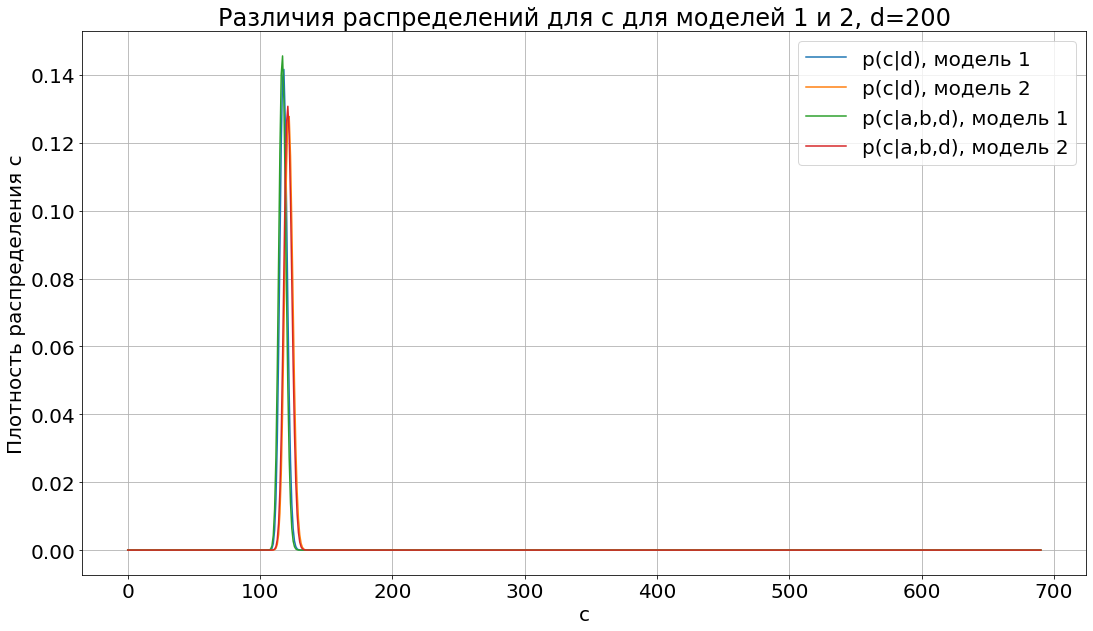

In [18]:
plt.figure(figsize=(18,10))
Ea = np.array([np.round(E(pa(params, 1)[0], range_a), 0).astype(int)])
Eb = np.array([np.round(E(pb(params, 1)[0], range_b), 0).astype(int)])
d_val = np.array([200]).astype(int)

pc_d_vals1 = pc_d(d_val, params, 1)[0]
pc_d_vals2 = pc_d(d_val, params, 2)[0]


pc_abd_vals1 = pc_abd(Ea, Eb, d_val, params, 1)[0].reshape((range_c.shape[0],))
pc_abd_vals2 = pc_abd(Ea, Eb, d_val, params, 2)[0].reshape((range_c.shape[0],))

plt.plot(range_c, pc_d_vals1, label='p(c|d), модель 1')
plt.plot(range_c, pc_d_vals2, label='p(c|d), модель 2')
plt.plot(range_c, pc_abd_vals1, label='p(c|a,b,d), модель 1')
plt.plot(range_c, pc_abd_vals2, label='p(c|a,b,d), модель 2')

plt.grid(True)
plt.legend()
plt.title('Различия распределений для c для моделей 1 и 2, d=200')
plt.xlabel('c')
plt.ylabel('Плотность распределения c')

plt.savefig('model1_2_diff_full.png')

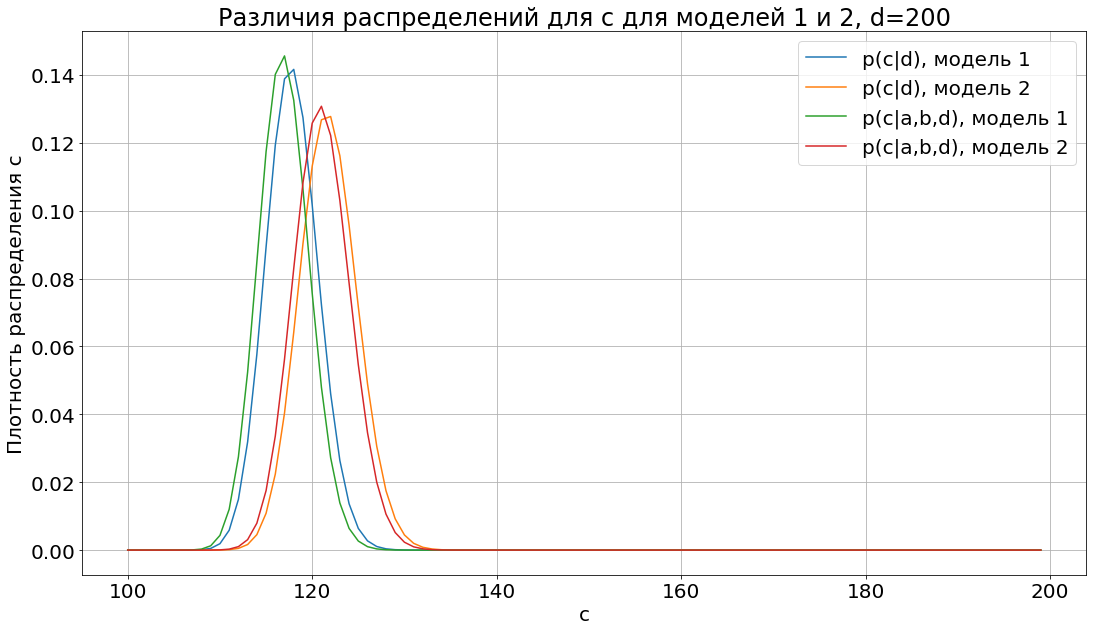

In [19]:
plt.figure(figsize=(18,10))
plt.plot(range_c[100:200], pc_d_vals1[100:200], label='p(c|d), модель 1')
plt.plot(range_c[100:200], pc_d_vals2[100:200], label='p(c|d), модель 2')
plt.plot(range_c[100:200], pc_abd_vals1[100:200], label='p(c|a,b,d), модель 1')
plt.plot(range_c[100:200], pc_abd_vals2[100:200], label='p(c|a,b,d), модель 2')

plt.grid(True)
plt.legend()
plt.title('Различия распределений для c для моделей 1 и 2, d=200')
plt.xlabel('c')
plt.ylabel('Плотность распределения c')

plt.savefig('model1_2_diff.png')

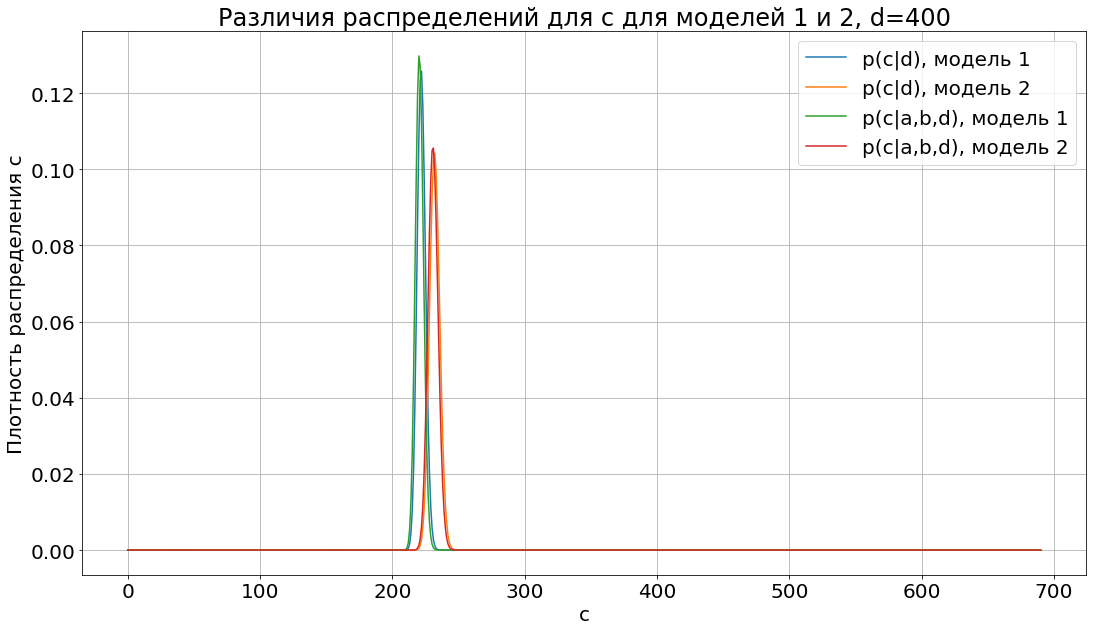

In [20]:
plt.figure(figsize=(18,10))
d_val = np.array([400]).astype(int)

pc_d_vals1 = pc_d(d_val, params, 1)[0]
pc_d_vals2 = pc_d(d_val, params, 2)[0]


pc_abd_vals1 = pc_abd(Ea, Eb, d_val, params, 1)[0].reshape((range_c.shape[0],))
pc_abd_vals2 = pc_abd(Ea, Eb, d_val, params, 2)[0].reshape((range_c.shape[0],))

plt.plot(range_c, pc_d_vals1, label='p(c|d), модель 1')
plt.plot(range_c, pc_d_vals2, label='p(c|d), модель 2')
plt.plot(range_c, pc_abd_vals1, label='p(c|a,b,d), модель 1')
plt.plot(range_c, pc_abd_vals2, label='p(c|a,b,d), модель 2')

plt.grid(True)
plt.legend()
plt.title('Различия распределений для c для моделей 1 и 2, d=400')
plt.xlabel('c')
plt.ylabel('Плотность распределения c')

plt.savefig('model1_2_diff_full_1.png')

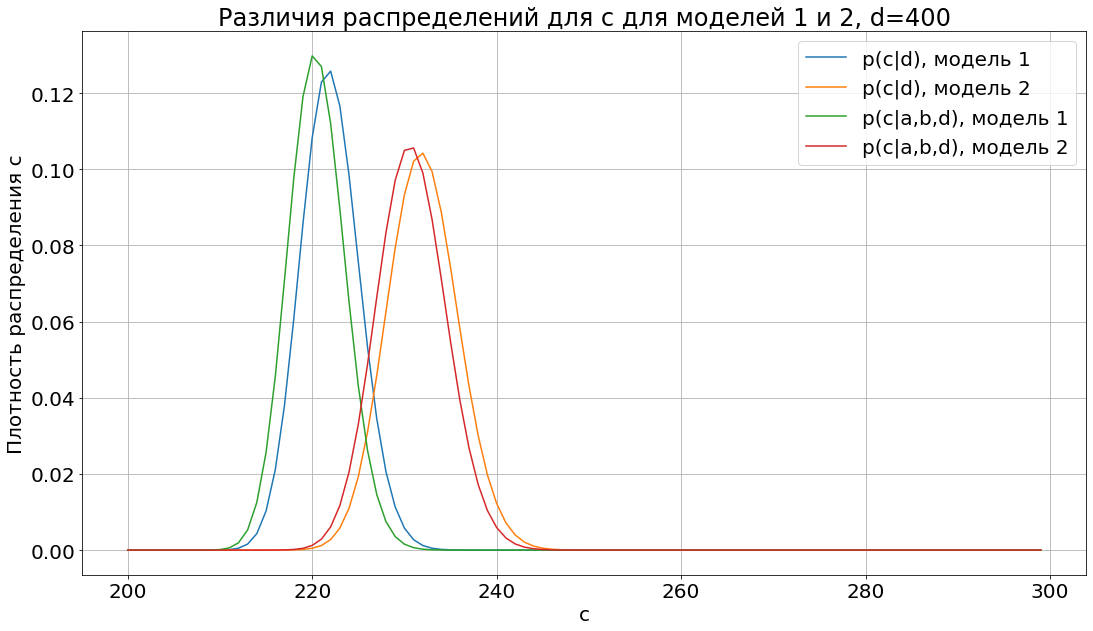

In [21]:
plt.figure(figsize=(18,10))
plt.plot(range_c[200:300], pc_d_vals1[200:300], label='p(c|d), модель 1')
plt.plot(range_c[200:300], pc_d_vals2[200:300], label='p(c|d), модель 2')
plt.plot(range_c[200:300], pc_abd_vals1[200:300], label='p(c|a,b,d), модель 1')
plt.plot(range_c[200:300], pc_abd_vals2[200:300], label='p(c|a,b,d), модель 2')

plt.grid(True)
plt.legend()
plt.title('Различия распределений для c для моделей 1 и 2, d=400')
plt.xlabel('c')
plt.ylabel('Плотность распределения c')

plt.savefig('model1_2_diff_1.png')